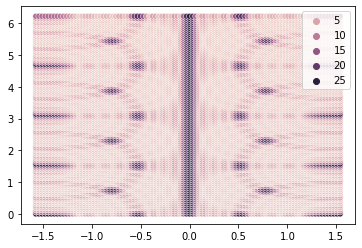

In [151]:
import numpy as np
import seaborn as sns

class AntennaArray(object):
    def __init__(self, nx, ny, dx, dy, theta_res, phi_res):
        self.nx, self.ny = nx, ny
        self.dx, self.dy = dx, dy
        self.theta_res = theta_res
        self.phi_res = phi_res
        self._init_amplitudes()
        self._build_mesh()
        
    def _build_mesh(self):
        self.theta, self.phi, *_ = np.meshgrid(
            # these first two build the actual grid 
            # of angles that we'll move through
            np.arange(-np.pi/2, np.pi/2, np.pi/self.theta_res),
            np.arange(0, 2*np.pi, 2*np.pi/self.phi_res),
            # these two then make sure we have an
            # angle grid to evaluable for each 
            # element in our array
            np.arange(1, self.nx+1, 1),
            np.arange(1, self.ny+1, 1),
        )
        self.m, self.n = np.meshgrid(
            np.arange(1, self.nx+1, 1),
            np.arange(1, self.ny+1, 1),
        )
        
    def get_array_factor(self, wavelength, theta, phi):
        # we get the vector shift
        du = np.sin(self.theta)*np.cos(self.phi) - np.sin(theta)*np.cos(phi)
        dv = np.sin(self.theta)*np.sin(self.phi) - np.sin(theta)*np.sin(phi)
        coef = 2j * np.pi / wavelength
        per_element = self.a * np.exp(coef * (self.m*self.dx*du + self.n*self.dy*dv))
        # sum over the last axes to sum over our elements
        gridded = np.sum(per_element, axis=(2, 3))
        return np.sqrt(np.real(gridded * np.conjugate(gridded)))
    
    def _init_amplitudes(self):
        self.a = np.ones((self.nx, self.ny))
        
antenna = AntennaArray(5, 5, 1, 1, 100, 100)
results = antenna.get_array_factor(0.5, np.pi/4, np.pi/4)
theta = antenna.theta[:,:,1,1]
theta = theta.reshape(theta.shape[0] * theta.shape[1])
phi = antenna.phi[:,:,1,1]
phi = phi.reshape(phi.shape[0] * phi.shape[1])
new_results = results.reshape(results.shape[0] * results.shape[1])
sns.scatterplot(x=theta, y=phi, hue=new_results);

In [149]:
4*np.pi/4

3.9269908169872414

In [141]:
np.pi/4

0.7853981633974483

In [98]:
theta, phi, *_ = np.meshgrid(
    np.arange(0, np.pi, np.pi/10),
    np.arange(0, np.pi, np.pi/10),
    np.arange(1, 5+1, 1),
    np.arange(1, 5+1, 1),
)

In [99]:
m

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [106]:
np.sum(m * np.sin(theta) * np.cos(phi) + n * np.sin(theta) * np.sin(phi), axis=(2,3))

array([[  0.        ,  23.17627458,  44.08389392,  60.67627458,
         71.32923872,  75.        ,  71.32923872,  60.67627458,
         44.08389392,  23.17627458],
       [  0.        ,  29.20380967,  55.54894698,  76.45656632,
         89.88008425,  94.5055133 ,  89.88008425,  76.45656632,
         55.54894698,  29.20380967],
       [  0.        ,  32.3726724 ,  61.57648207,  84.75275665,
         99.6328409 , 104.7601685 ,  99.6328409 ,  84.75275665,
         61.57648207,  32.3726724 ],
       [  0.        ,  32.3726724 ,  61.57648207,  84.75275665,
         99.6328409 , 104.7601685 ,  99.6328409 ,  84.75275665,
         61.57648207,  32.3726724 ],
       [  0.        ,  29.20380967,  55.54894698,  76.45656632,
         89.88008425,  94.5055133 ,  89.88008425,  76.45656632,
         55.54894698,  29.20380967],
       [  0.        ,  23.17627458,  44.08389392,  60.67627458,
         71.32923872,  75.        ,  71.32923872,  60.67627458,
         44.08389392,  23.17627458],
       [  

In [92]:
np.sum(np.sum(theta, axis=2), axis=2)

array([[ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144, 62.83185307, 70.68583471],
       [ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144, 62.83185307, 70.68583471],
       [ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144, 62.83185307, 70.68583471],
       [ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144, 62.83185307, 70.68583471],
       [ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144, 62.83185307, 70.68583471],
       [ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144, 62.83185307, 70.68583471],
       [ 0.        ,  7.85398163, 15.70796327, 23.5619449 , 31.41592654,
        39.26990817, 47.1238898 , 54.97787144

In [58]:
phi

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927,
        0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927],
       [0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
        0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853],
       [0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 ,
        0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 ],
       [1.25663706, 1.25663706, 1.25663706, 1.25663706, 1.25663706,
        1.25663706, 1.25663706, 1.25663706, 1.25663706, 1.25663706],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633,
        1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [1.88495559, 1.88495559, 1.88495559, 1.88495559, 1.88495559,
        1.88495559, 1.88495559, 1.88495559, 1.88495559, 1.88495559],
       [2.19911486, 2.19911486, 2.1991148

In [66]:
du = np.sin(theta)*np.cos(phi) - np.sin(np.pi/4)*np.cos(np.pi/4)
dv = np.sin(theta)*np.sin(phi) - np.sin(np.pi/4)*np.sin(np.pi/4)


In [72]:
m, n = np.meshgrid(
    np.arange(1, 5 + 1, 1),
    np.arange(1, 5 + 1, 1)
)
a = np.ones((5, 5))
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [78]:
np.repeat(np.array([1, 2, 3]), 5, axis=2)

AxisError: axis 2 is out of bounds for array of dimension 1

In [79]:
a = np.array([1, 2, 3])

In [81]:
a.resize((3, 3))

In [82]:
a 

array([[1, 2, 3],
       [0, 0, 0],
       [0, 0, 0]])